In [209]:
from ohsome import OhsomeClient

import altair as alt
import altair_tiles as til

import geopandas as gpd
import pandas as pd

import branca.colormap as cm
import numpy as np

import matplotlib.pyplot as plt


from datetime import datetime



# get rasters (w net and acc info)

In [210]:
#gdf_polygons_filtered_germany = gpd.read_file(r"output\gdf_polygons_filtered_germany.gpkg")
germany_raster2022_net_acc = gpd.read_file("../output/germany_raster2022_net_acc.gpkg")

germany_raster2022_net_acc

,id_left,2018_length_50,2024_length_50,2018_length_30,2024_length_30,2018_total_length,2018_ratio,2024_total_length,2024_ratio,diff_total_length,...,2018_count,2019_count,2020_count,2021_count,2022_count,2023_count,vorher,nachher,unfall_ratio,geometry
0,1kmN2920E4186,0.000000,328.788848,333.719777,3.172751,333.719777,1.000000,331.961600,0.009558,-1.758177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((8.1411 49.37758, 8.15486 49.37..."
1,1kmN3376E4317,0.000000,405.627253,429.872263,21.858073,429.872263,1.000000,427.485327,0.051132,-2.386937,...,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,-1.0,"MULTIPOLYGON (((9.93974 53.49176, 9.95481 53.4..."
2,1kmN3269E4561,0.000000,345.792993,372.438696,24.254439,372.438696,1.000000,370.047431,0.065544,-2.391265,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,"MULTIPOLYGON (((13.53385 52.47785, 13.54855 52..."
3,1kmN2868E4278,52.623281,770.512547,734.514330,12.275386,787.137611,0.933146,782.787934,0.015682,-4.349677,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,"MULTIPOLYGON (((9.41341 48.92369, 9.42705 48.9..."
4,1kmN2795E4339,47.286727,974.807076,972.420970,44.923880,1019.707697,0.953627,1019.730956,0.044055,0.023259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((10.24235 48.26825, 10.25582 48..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394,1kmN2732E4156,465.539668,0.000000,0.000000,510.533903,465.539668,0.000000,510.533903,1.000000,44.994236,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,"MULTIPOLYGON (((7.80354 47.67957, 7.81685 47.6..."
7395,1kmN3006E4203,35.760527,0.000000,0.000000,35.760527,35.760527,0.000000,35.760527,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((8.34886 50.1543, 8.36285 50.15..."
7396,1kmN2763E4171,273.755348,0.000000,0.000000,278.852819,273.755348,0.000000,278.852819,1.000000,5.097470,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,"MULTIPOLYGON (((7.99223 47.96225, 8.00561 47.9..."
7397,1kmN2831E4201,144.273724,0.000000,0.000000,140.604107,144.273724,0.000000,140.604107,1.000000,-3.669616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((8.37411 48.5805, 8.38765 48.58..."


In [211]:

# doing some data cleaning, round and set order of columns

first_year = "2018"
last_year = "2024"

# List of columns to round to the nearest integer
columns_to_round = [
    f"{first_year}_length_50", f"{last_year}_length_50", f"{first_year}_length_30", f"{last_year}_length_30",
    f"{first_year}_total_length", f"{last_year}_total_length", "diff_total_length"
]

# List of columns to round to two decimal places
columns_to_round_2 = [
    f"{first_year}_ratio", f"{last_year}_ratio",
    "diff_total_length_rel", "diff_ratio_tempo30"
]

# Round the specified columns to the nearest integer and convert to integer type
germany_raster2022_net_acc[columns_to_round] = germany_raster2022_net_acc[columns_to_round].round(0).astype(int)

# Round the specified columns to two decimal places
germany_raster2022_net_acc[columns_to_round_2] = germany_raster2022_net_acc[columns_to_round_2].round(2)


# Define the new column order
new_column_order = [
    "id_left",
    f"{first_year}_length_30", f"{first_year}_length_50", f"{first_year}_total_length", f"{first_year}_ratio",
    f"{last_year}_length_30", f"{last_year}_length_50", f"{last_year}_total_length", f"{last_year}_ratio",
    "diff_total_length", "diff_total_length_rel", "diff_ratio_tempo30"
]

# Reorder the columns while keeping the rest unchanged
remaining_columns = [col for col in germany_raster2022_net_acc.columns if col not in new_column_order]
final_column_order = new_column_order + remaining_columns

# Reorder DataFrame
germany_raster2022_net_acc = germany_raster2022_net_acc[final_column_order]

gdf_rasters=germany_raster2022_net_acc.to_crs(epsg=3857).copy()


In [212]:

#count_columns = germany_raster2022_net_acc.filter(like="_count").columns.tolist()
#count_columns

In [213]:
### to leave out MV, NRW and TH
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland_in=bland[~bland["id"].isin(["DE-MV","DE-NW","DE-TH"])]
bland_out=bland[bland["id"].isin(["DE-MV","DE-NW","DE-TH"])]

In [214]:
### add Bundesland to Kacheln

# Make sure both GeoDataFrames have the same CRS
bland_in = bland_in.to_crs(gdf_rasters.crs)
bland_in_join=bland_in.rename(columns={"id":"bland"}).copy()

# Compute centroids of raster polygons
gdf_rasters_centroids = gdf_rasters.copy()
gdf_rasters_centroids["geometry"] = gdf_rasters_centroids.centroid

# Perform spatial join: assign bland_in attributes to rasters via centroid
rasters_with_attrs = gpd.sjoin(
    gdf_rasters_centroids, bland_in_join[["bland","geometry"]], how="left", predicate="within"
)

# Restore original raster geometry (replace centroids with original polygons)
rasters_with_attrs["geometry"] = gdf_rasters.geometry.values


# If you want the full result as a new GeoDataFrame:
gdf_rasters = rasters_with_attrs

gdf_rasters.head()

,id_left,2018_length_30,2018_length_50,2018_total_length,2018_ratio,2024_length_30,2024_length_50,2024_total_length,2024_ratio,diff_total_length,...,2020_count,2021_count,2022_count,2023_count,vorher,nachher,unfall_ratio,geometry,index_right,bland
0,1kmN2920E4186,334,0,334,1.00,3,329,332,0.01,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((906263.143 6339173.011, 907795...",10.0,DE-RP
1,1kmN3376E4317,430,0,430,1.00,22,406,427,0.05,-2,...,2.0,2.0,0.0,0.0,1.0,0.0,-1.0,"MULTIPOLYGON (((1106486.835 7074483.569, 11081...",5.0,DE-HH
2,1kmN3269E4561,372,0,372,1.00,24,346,370,0.07,-2,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,"MULTIPOLYGON (((1506580.906 6886992.892, 15082...",2.0,DE-BE
3,1kmN2868E4278,735,53,787,0.93,12,771,783,0.02,-4,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,"MULTIPOLYGON (((1047895.762 6261923.049, 10494...",0.0,DE-BW
4,1kmN2795E4339,972,47,1020,0.95,45,975,1020,0.04,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((1140173.592 6151599.046, 11416...",1.0,DE-BY


## Choosing the Kachel

In [215]:
#pd.set_option("display.max_columns", None)  # Show all columns
#gdf_rasters[gdf_rasters["unfall_ratio"]<-0.5].sort_values("diff_ratio_tempo30")[:5]

<Axes: >

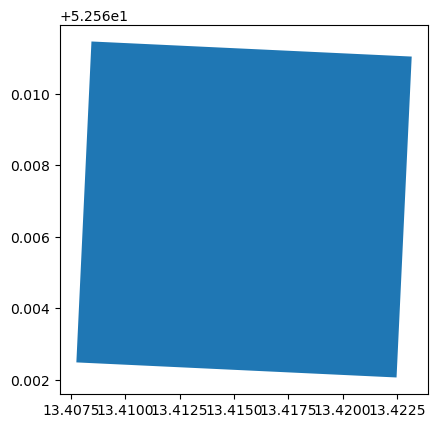

In [301]:

### Neue 2022er Kacheln
#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN2865E4224"] # Pforzheim

#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN2876E4480"] # ??

#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN3269E4554"] # Berlin-Neukölln
#berlin="yes" # this is just a flag coz berlin dosnt hav data in 2017

#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN2988E4197"] # Mainz

#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN3002E4223"] # Frankfurt





## for presentation
#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN2765E4156"] # Sankt Georgen

#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN3269E4554"] # Berlin-Neukölln

gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN3278E4552"] # Berlin-Pankow



#if gdf_osm_shape_poly.bland=="DE-BE":
if gdf_osm_shape_poly.bland.iloc[0] == "DE-BE":
    is_berlin=True
else:
    is_berlin=False



gdf_osm_shape_poly=gdf_osm_shape_poly.to_crs(4326)
gdf_osm_shape_poly.plot()

# get network incl. history

In [302]:
def getHistoryOSM(bpolys):
    client = OhsomeClient()

    time = "2017-01-01,2024-01-01"
    fltr = "(highway in (primary, primary_link, secondary, secondary_link, tertiary, tertiary_link)) and type:way"

    properties = "tags" # to retreive OSM tags along with the geometries
    #bpolys=gdf_osm_shape_poly#.buffer(0.0001)

    response = client.elementsFullHistory.geometry.post(bpolys=bpolys, time=time, filter=fltr, properties=properties, timeout=100)

    response_df = response.as_dataframe()
    return response_df

hist_roads_gdf=getHistoryOSM(gdf_osm_shape_poly)


def addingExtraTags(df_):
    df=df_.copy()
    for ind,row in df.iterrows():        
        tags = row['@other_tags']
        # Print the keys and values
        for key, value in tags.items():
            if key=="maxspeed":
                df.at[ind, "maxspeed"] = value
            if key=="maxspeed:conditional":
                df.at[ind, "maxspeed:conditional"] = value
            if key=="highway":
                df.at[ind, "highway"] = value
            if key=="name":
                df.at[ind, "name"] = value

    return df


hist_roads_gdf_tags=addingExtraTags(hist_roads_gdf)
hist_roads_gdf_tags

geometry  \
@osmId         @validFrom          @validTo                                                                 
way/1021947367 2022-01-17 13:08:20 2022-01-19 08:28:22  LINESTRING (13.41376 52.56638, 13.41377 52.566...   
               2022-01-19 08:28:22 2022-08-14 17:49:34  LINESTRING (13.41376 52.56638, 13.41377 52.566...   
               2022-08-14 17:49:34 2023-05-25 11:48:39  LINESTRING (13.41376 52.56638, 13.41377 52.566...   
               2023-05-25 11:48:39 2023-11-17 09:02:56  LINESTRING (13.41376 52.56638, 13.41377 52.566...   
               2023-11-17 09:02:56 2024-01-01 00:00:00  LINESTRING (13.41376 52.56638, 13.41377 52.566...   
...                                                                                                   ...   
way/949605667  2023-07-07 13:53:10 2023-10-09 21:00:32  LINESTRING (13.40995 52.56242, 13.40985 52.562...   
               2023-10-09 21:00:32 2023-11-17 18:44:10  LINESTRING (13.40995 52.56242, 13.40985 52.562...   
               2023-11-17 18:44:10 2023-11-18 10:24:01  LINESTRING (13.40995 52.56242, 13.40985 52.562...   
               2023-11-18 10:24:01 2023-11-19 09:31:21  LINESTRING (13.40994 52.56242, 13.40985 52.562...   
               2023-11-19 09:31:21 2024-01-01 00:00:00  LINESTRING (13.40994 52.56242, 13.40985 52.562...   

                                                                                              @other_tags  \
@osmId         @validFrom          @validTo                                                                 
way/1021947367 2022-01-17 13:08:20 2022-01-19 08:28:22  {'cycleway:both': 'no', 'highway': 'tertiary',...   
               2022-01-19 08:28:22 2022-08-14 17:49:34  {'cycleway:both': 'no', 'highway': 'tertiary',...   
               2022-08-14 17:49:34 2023-05-25 11:48:39  {'cycleway:both': 'no', 'highway': 'tertiary',...   
               2023-05-25 11:48:39 2023-11-17 09:02:56  {'cycleway:both': 'no', 'highway': 'tertiary',...   
               2023-11-17 09:02:56 2024-01-01 00:00:00  {'cycleway:both': 'no', 'foot': 'use_sidepath'...   
...                                                                                                   ...   
way/949605667  2023-07-07 13:53:10 2023-10-09 21:00:32  {'cycleway:both': 'no', 'highway': 'primary', ...   
               2023-10-09 21:00:32 2023-11-17 18:44:10  {'cycleway:both': 'no', 'highway': 'primary', ...   
               2023-11-17 18:44:10 2023-11-18 10:24:01  {'cycleway:both': 'no', 'highway': 'primary', ...   
               2023-11-18 10:24:01 2023-11-19 09:31:21  {'cycleway:both': 'no', 'highway': 'primary', ...   
               2023-11-19 09:31:21 2024-01-01 00:00:00  {'cycleway:both': 'no', 'foot': 'use_sidepath'...   

                                                         highway maxspeed  \
@osmId         @validFrom          @validTo                                 
way/1021947367 2022-01-17 13:08:20 2022-01-19 08:28:22  tertiary       50   
               2022-01-19 08:28:22 2022-08-14 17:49:34  tertiary       50   
               2022-08-14 17:49:34 2023-05-25 11:48:39  tertiary       50   
               2023-05-25 11:48:39 2023-11-17 09:02:56  tertiary       50   
               2023-11-17 09:02:56 2024-01-01 00:00:00  tertiary       50   
...                                                          ...      ...   
way/949605667  2023-07-07 13:53:10 2023-10-09 21:00:32   primary       50   
               2023-10-09 21:00:32 2023-11-17 18:44:10   primary       50   
               2023-11-17 18:44:10 2023-11-18 10:24:01   primary       50   
               2023-11-18 10:24:01 2023-11-19 09:31:21   primary       50   
               2023-11-19 09:31:21 2024-01-01 00:00:00   primary       50   

                                                                   name  \
@osmId         @validFrom          @validTo                               
way/1021947367 2022-01-17 13:08:20 2022-01-19 08:28:22  Kissingenstraße   
               2022-01-19 08:28:22

### cleanup: drop/rename columns

In [324]:
def process_hist_roads_gdf_tags(hist_roads_gdf_tags):
    hist_roads_gdf_tags = hist_roads_gdf_tags.drop(columns=['@other_tags'])
    hist_roads_gdf_tags_highway = hist_roads_gdf_tags[hist_roads_gdf_tags.highway.isin(["primary", "secondary", "tertiary", "primary_link", "secondary_link", "tertiary_link"])].copy()
    hist_roads_gdf_tags_highway = hist_roads_gdf_tags[hist_roads_gdf_tags.maxspeed.isin(["30", "50"])].copy()

    hist_roads_gdf_tags_highway = hist_roads_gdf_tags_highway.reset_index().copy()
    hist_roads_gdf_tags_highway = hist_roads_gdf_tags_highway.rename(columns={'@osmId': 'osmId', '@validFrom': 'validFrom', '@validTo': 'validTo', '@other_tags': 'other_tags'})

    if "maxspeed:conditional" not in hist_roads_gdf_tags_highway.columns:
        hist_roads_gdf_tags_highway["maxspeed:conditional"] = None

    return hist_roads_gdf_tags_highway

hist_roads_gdf_tags_highway = process_hist_roads_gdf_tags(hist_roads_gdf_tags)
hist_roads_gdf_tags_highway

,osmId,validFrom,validTo,geometry,highway,maxspeed,name,maxspeed:conditional
0,way/1021947367,2022-01-17 13:08:20,2022-01-19 08:28:22,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,NaN
1,way/1021947367,2022-01-19 08:28:22,2022-08-14 17:49:34,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,NaN
2,way/1021947367,2022-08-14 17:49:34,2023-05-25 11:48:39,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,NaN
3,way/1021947367,2023-05-25 11:48:39,2023-11-17 09:02:56,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,NaN
4,way/1021947367,2023-11-17 09:02:56,2024-01-01 00:00:00,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,NaN
...,...,...,...,...,...,...,...,...
1212,way/949605667,2023-07-07 13:53:10,2023-10-09 21:00:32,"LINESTRING (13.40995 52.56242, 13.40985 52.562...",primary,50,Mühlenstraße,NaN
1213,way/949605667,2023-10-09 21:00:32,2023-11-17 18:44:10,"LINESTRING (13.40995 52.56242, 13.40985 52.562...",primary,50,Mühlenstraße,NaN
1214,way/949605667,2023-11-17 18:44:10,2023-11-18 10:24:01,"LINESTRING (13.40995 52.56242, 13.40985 52.562...",primary,50,Mühlenstraße,NaN
1215,way/949605667,2023-11-18 10:24:01,2023-11-19 09:31:21,"LINESTRING (13.40994 52.56242, 13.40985 52.562...",primary,50,Mühlenstraße,NaN


In [325]:

hist_roads_gdf_tags_highway[hist_roads_gdf_tags_highway["maxspeed:conditional"].notnull()]	

,osmId,validFrom,validTo,geometry,highway,maxspeed,name,maxspeed:conditional
13,way/1086258345,2022-08-14 18:13:34,2022-08-14 18:13:35,"LINESTRING (13.42059 52.56705, 13.42035 52.56717)",tertiary,50,Neumannstraße,30 @ (Mo-Fr 7:00-19:00)
14,way/1086258345,2022-08-14 18:13:35,2023-01-18 14:44:03,"LINESTRING (13.42059 52.56705, 13.42035 52.56717)",tertiary,50,Neumannstraße,30 @ (Mo-Fr 7:00-19:00)
15,way/1086258345,2023-01-18 14:44:03,2023-02-24 05:03:55,"LINESTRING (13.42059 52.56705, 13.42035 52.56717)",tertiary,50,Neumannstraße,30 @ (Mo-Fr 7:00-19:00)
16,way/1086258345,2023-02-24 05:03:55,2023-07-12 21:09:30,"LINESTRING (13.42059 52.56705, 13.42035 52.56717)",tertiary,50,Neumannstraße,30 @ (Mo-Fr 7:00-19:00)
17,way/1086258345,2023-07-12 21:09:30,2024-01-01 00:00:00,"LINESTRING (13.42059 52.56705, 13.42035 52.56717)",tertiary,50,Neumannstraße,30 @ (Mo-Fr 7:00-19:00)
...,...,...,...,...,...,...,...,...
1204,way/855646793,2023-02-24 05:03:55,2023-07-12 21:09:50,"LINESTRING (13.41874 52.5668, 13.41882 52.5668...",tertiary,50,Kissingenstraße,30 @ (Mo-Fr 07:00-17:00)
1205,way/855646793,2023-07-12 21:09:50,2023-09-25 17:12:42,"LINESTRING (13.41874 52.5668, 13.41882 52.5668...",tertiary,50,Kissingenstraße,30 @ (Mo-Fr 07:00-17:00)
1206,way/855646793,2023-09-25 17:12:42,2023-09-25 20:06:55,"LINESTRING (13.41874 52.5668, 13.41882 52.5668...",tertiary,50,Kissingenstraße,30 @ (Mo-Fr 07:00-17:00)
1207,way/855646793,2023-09-25 20:06:55,2023-10-28 22:00:37,"LINESTRING (13.41874 52.5668, 13.41882 52.5668...",tertiary,50,Kissingenstraße,30 @ (Mo-Fr 07:00-17:00)


<Axes: >

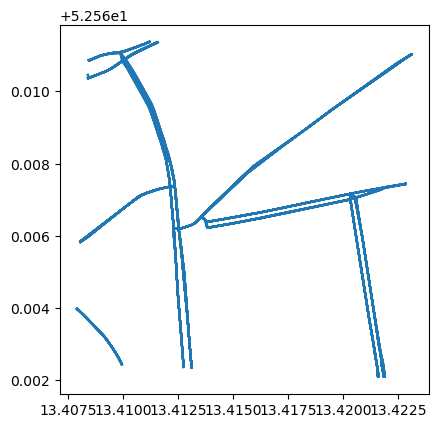

In [305]:
hist_roads_gdf_tags_highway.plot()

### rechne die Netzlänge zum Jahresanfang

In [308]:
def compute_yearly_maxspeed_lengths(osm_data: gpd.GeoDataFrame, crs_epsg: int = 25832) -> pd.DataFrame:
    """
    Computes yearly total road length per maxspeed category based on historical OSM data.

    Parameters:
    -----------
    osm_data : GeoDataFrame
        GeoDataFrame with at least 'validFrom', 'validTo', 'geometry', 'maxspeed', and 'maxspeed:conditional' columns.
    crs_epsg : int, optional
        The EPSG code for a projected CRS (default is 25832 for UTM zone 32N, good for Germany).

    Returns:
    --------
    DataFrame
        Pivoted DataFrame with years as rows and maxspeed categories as columns (in kilometers),
        including an extra column for special conditional cases ("50conditional30").
    """

    # Ensure datetime
    osm_data = osm_data.copy()
    osm_data["validFrom"] = pd.to_datetime(osm_data["validFrom"])
    osm_data["validTo"] = pd.to_datetime(osm_data["validTo"])

    # Ensure projected CRS for accurate length calculation
    if osm_data.crs is None or osm_data.crs.is_geographic:
        osm_data = osm_data.to_crs(epsg=crs_epsg)

    # Determine full year range
    years = list(range(osm_data["validFrom"].dt.year.min(), osm_data["validTo"].dt.year.max() + 1))

    # Helper to get road state on a specific date
    def get_state_on_date(df, target_date):
        return df[(df["validFrom"] <= target_date) & (df["validTo"] >= target_date)]

    yearly_lengths = []

    for year in years:
        date = pd.Timestamp(f"{year}-01-01")
        filtered_df = get_state_on_date(osm_data, date)

        if not filtered_df.empty:
            filtered_df = filtered_df.copy()
            filtered_df["length"] = filtered_df.geometry.length
            filtered_df["maxspeed:conditional"] = filtered_df["maxspeed:conditional"].astype(str)

            # Handle special case: maxspeed == "50" and maxspeed:conditional starts with "30 @"
            cond_col = "maxspeed:conditional"
            cond_mask = (
                (filtered_df["maxspeed"] == "50") &
                (filtered_df[cond_col].str.startswith("30 @"))
            )

            cond_length = filtered_df.loc[cond_mask, "length"].sum()

            # Remove these conditional rows from main grouping to avoid double counting
            filtered_df_main = filtered_df.loc[~cond_mask]

            # Handle normal maxspeed grouping (after removing conditional rows)
            summary = filtered_df_main.groupby("maxspeed")["length"].sum().reset_index()
            summary["year"] = year

            # Add conditional length as separate row
            if cond_length > 0:
                summary = pd.concat([
                    summary,
                    pd.DataFrame({"maxspeed": ["50conditional30"], "length": [cond_length], "year": [year]})
                ], ignore_index=True)

            yearly_lengths.append(summary)

    if not yearly_lengths:
        return pd.DataFrame()  # Return empty DataFrame if no data

    df_lengths = pd.concat(yearly_lengths, ignore_index=True)
    df_lengths["length_km"] = df_lengths["length"] / 1000

    # Pivot for better readability
    df_lengths_pivot = df_lengths.pivot(index="year", columns="maxspeed", values="length_km").fillna(0)

    if "50conditional30" not in df_lengths_pivot.columns:
        df_lengths_pivot["50conditional30"] = 0.0

    return df_lengths_pivot.reset_index()

In [309]:
df_lengths_pivot = compute_yearly_maxspeed_lengths(hist_roads_gdf_tags_highway)
df_lengths_pivot

maxspeed,year,30,50,50conditional30
0,2017,3.192757,3.176353,0.000000
1,2018,3.192459,3.179254,0.000000
2,2019,3.196711,2.821929,0.000000
3,2020,3.196514,2.637761,0.170988
4,2021,0.867458,3.568930,1.570332
5,2022,0.867458,3.568930,1.570332
6,2023,0.826748,3.610434,1.571500
7,2024,0.596830,3.478777,1.932112


### prepare accidents

In [310]:
def get_accidents_along_relevant_roads(gdf_osm_shape_poly, hist_roads_gdf_tags_highway):
    osm_roads_all_buffer = hist_roads_gdf_tags_highway.copy()
    osm_roads_all_buffer = osm_roads_all_buffer.to_crs(25832)
    osm_roads_all_buffer["geometry"] = osm_roads_all_buffer.buffer(10)

    accidents = gpd.read_file(r"../accident_data/accidents_germany_2017-2023_si.gpkg", mask=gdf_osm_shape_poly)
    #print(f"Total accidents in the raster: {len(accidents)}")
    accidents_25832 = accidents.to_crs(25832)
    accidents_clipped = accidents_25832.clip(osm_roads_all_buffer)
    #print(f"Total accidents in the raster along relavant roads: {len(accidents_clipped)}")

    return accidents_clipped

accidents_clipped = get_accidents_along_relevant_roads(gdf_osm_shape_poly, hist_roads_gdf_tags_highway)
accidents_clipped

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstSonstig,LICHT,USTRZUSTAND,IstGkfz,OID_,PLST,geometry
114,139373.0,11,0,3,3,2020,6,12,2,3,...,1,0,0,0,0,0,0.0,NaN,NaN,POINT (799666.696 5832767.677)
117,NaN,11,0,3,3,2023,2,0,2,3,...,1,0,0,0,2,0,0.0,237975.0,1.0,POINT (799665.189 5832774.456)
116,235992.0,11,0,3,3,2022,8,14,3,3,...,1,1,0,0,0,0,0.0,NaN,NaN,POINT (799665.128 5832774.73)
3,199716.0,11,0,3,3,2018,4,11,1,3,...,1,0,0,0,0,0,0.0,NaN,NaN,POINT (799635.147 5832787.939)
118,136090.0,11,0,3,3,2020,1,8,4,3,...,1,0,0,0,0,0,0.0,NaN,NaN,POINT (799635.284 5832787.967)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,11,0,3,3,2023,3,10,3,2,...,1,1,0,0,0,1,0.0,237597.0,1.0,POINT (799148.451 5833287.248)
101,137147.0,11,0,3,3,2020,3,15,4,3,...,0,0,0,0,0,0,0.0,NaN,NaN,POINT (798724.749 5833679.04)
27,198833.0,11,0,3,3,2019,8,14,5,3,...,1,0,0,0,0,0,0.0,NaN,NaN,POINT (798733.271 5833689.212)
24,208105.0,11,0,3,3,2018,12,15,6,3,...,1,0,0,0,2,1,0.0,NaN,NaN,POINT (798731.947 5833692.834)


# concated viz (dashboardish)

### road length plot

In [311]:
def plot_road_lengths_by_maxspeed(df_lengths_pivot: pd.DataFrame) -> alt.Chart:
    """
    Plots road lengths by maxspeed and year as a line chart using Altair.
    Shows dashed line for '50conditional30' in both chart and legend.
    """

    import altair as alt
    import pandas as pd

    data = df_lengths_pivot.copy()
    data["Total Length"] = data.drop(columns=["year"]).sum(axis=1)

    data_long = data.melt(
        id_vars=["year"],
        var_name="maxspeed",
        value_name="length"
    )

    color_scale = alt.Scale(
        domain=["30", "50conditional30", "50", "Total Length"],
        range=["green", "orange", "orange", "gray"]
    )

    stroke_dash_scale = alt.Scale(
        domain=["30", "50conditional30", "50", "Total Length"],
        range=[[1, 0], [4, 4], [1, 0], [1, 0]]
    )

    chart = alt.Chart(data_long).mark_line(point=True).encode(
    x=alt.X("year:O", title="Jahr"),
    y=alt.Y("length:Q", title="Länge (km)"),
    color=alt.Color(
        "maxspeed:N",
        title="Maxspeed",
        scale=color_scale,
        legend=alt.Legend(
            symbolType="stroke",
            symbolSize=200,
            symbolStrokeWidth=4
        )
    ),
    strokeDash=alt.StrokeDash(
        "maxspeed:N",
        scale=stroke_dash_scale
    ),
    tooltip=[
        alt.Tooltip("year:O", title="Jahr"),
        alt.Tooltip("maxspeed:N", title="Maxspeed"),
        alt.Tooltip("length:Q", format=".2f", title="Länge (km)")
    ]
).properties(
    title="Straßenlängen nach zul. Geschwindigkeit (maxspeed)",
    width=600,
    height=400
)

    return chart


road_length_plot = plot_road_lengths_by_maxspeed(df_lengths_pivot)
road_length_plot

alt.Chart(...)

In [312]:
### someday i could also flad instead of clip

#import geopandas as gpd
#
## Ensure both GeoDataFrames are in the same CRS
#accidents_25832 = accidents_25832.to_crs(25832)
#osm_roads_all_buffer = osm_roads_all_buffer.to_crs(25832)
#
## **🚀 Spatial Join to Check Containment**
#accidents_flagged = accidents_25832.sjoin(osm_roads_all_buffer, how="left", predicate="within")
#
## **🚀 Add "hvs" Flag**
#accidents_flagged["hvs"] = accidents_flagged["index_right"].notna().map({True: "yes", False: "no"})
#
## **🚀 Drop unnecessary join columns**
#accidents_flagged = accidents_flagged.drop(columns=["index_right"])
#
## ✅ Show Result
#accidents_flagged.head()
#

### accidents bar plot


In [313]:

def plot_accidents_by_year_and_category(
    accidents_clipped: gpd.GeoDataFrame,
    is_berlin: bool = False
) -> alt.Chart:
    """
    Plots a stacked bar chart of accident counts per year and category.

    Parameters:
    -----------
    accidents_clipped : GeoDataFrame
        Accident data clipped to a relevant area, must include 'UJAHR' and 'UKATEGORIE'.
    is_berlin : bool
        Whether the area is in Berlin (adds a 'No Data' label for 2017 if True).

    Returns:
    --------
    Altair Chart
        A stacked bar chart showing accidents per year by category.
    """

    # Ensure correct CRS for display/export
    accidents_clipped = accidents_clipped.to_crs(4326).copy()

    # Select relevant columns
    data = accidents_clipped[["UJAHR", "UKATEGORIE"]]

    # Aggregate counts
    df_agg = data.groupby(["UJAHR", "UKATEGORIE"]).size().reset_index(name="count")

    # Full year/category matrix (to fill gaps)
    years = list(range(2017, 2025))
    categories = df_agg["UKATEGORIE"].unique()
    df_full = pd.DataFrame([(y, c) for y in years for c in categories], columns=["UJAHR", "UKATEGORIE"])
    df_agg = df_full.merge(df_agg, on=["UJAHR", "UKATEGORIE"], how="left").fillna(0)
    df_agg["count"] = df_agg["count"].astype(int)

    # Stacked bar chart
    bar_chart = alt.Chart(df_agg).mark_bar().encode(
        x=alt.X("UJAHR:O", title="Jahr", scale=alt.Scale(domain=years)),
        y=alt.Y("count:Q", title="Anzahl Unfälle", axis=alt.Axis(tickMinStep=1)),
        color=alt.Color(
            "UKATEGORIE:N",
            title="Unfallkategorie",
            scale=alt.Scale(domain=[1, 2, 3], range=["darkred", "red", "pink"])
        ),
        tooltip=["UJAHR", "UKATEGORIE", "count"]
    ).properties(
        title="Unfälle pro Jahr und Unfallkategorie",
        width=300,
        height=150
    )

    # Add "No Data" annotation for 2024
    max_count = df_agg["count"].max()
    annotations = [
        alt.Chart(pd.DataFrame({
            "UJAHR": [2024],
            "count": [max_count * 0.05]
        })).mark_text(
            text="No Data", dx=20, size=11,
            color="black", fontWeight="bold", angle=270
        ).encode(
            x="UJAHR:O",
            y="count:Q"
        )
    ]

    # Optional: add annotation for 2017 if Berlin
    if is_berlin:
        annotations.append(
            alt.Chart(pd.DataFrame({
                "UJAHR": [2017],
                "count": [max_count * 0.05]
            })).mark_text(
                text="No Data", dx=20, size=11,
                color="black", fontWeight="bold", angle=270
            ).encode(
                x="UJAHR:O",
                y="count:Q"
            )
        )

    # Combine bar chart with annotations
    for anno in annotations:
        bar_chart += anno

    return bar_chart

bar_chart = plot_accidents_by_year_and_category(accidents_clipped, is_berlin)
bar_chart

alt.LayerChart(...)

#### kachel_infobox

In [314]:

def create_kachel_infobox(gdf_row: gpd.GeoDataFrame) -> alt.Chart:
    """
    Creates an Altair infobox chart for a single Kachel/Tile with formatted metrics.

    Parameters:
    -----------
    gdf_row : GeoDataFrame
        A single-row GeoDataFrame (e.g., filtered from a larger set) containing at least
        'id', 'unfall_ratio', and 'diff_ratio_tempo30' fields.

    Returns:
    --------
    Altair Chart
        An infobox-style chart displaying the formatted values.
    """

    # Copy and format percentages
    kachel_infobox = gdf_row.copy()
    kachel_infobox["unfall_ratio"] = (kachel_infobox["unfall_ratio"].round(2) * 100).astype(int).astype(str) + " %"
    kachel_infobox["diff_ratio_tempo30"] = (kachel_infobox["diff_ratio_tempo30"].round(2) * 100).astype(int).astype(str) + " Prozentpunkte"

    # Transpose and clean for Altair
    df_transposed = kachel_infobox.reset_index().T
    df_transposed_clean = (
        df_transposed.reset_index()
        .rename(columns={"index": "names", 0: "values"})
    )

    # Keep only relevant fields and rename for display
    df_transposed_clean = df_transposed_clean[df_transposed_clean.names.isin(["id", "diff_ratio_tempo30", "unfall_ratio"])]
    df_transposed_clean["names"] = df_transposed_clean["names"].replace({
        "diff_ratio_tempo30": "Änderung Verhältnis Tempo50/30",
        "unfall_ratio": "Änderung Unfälle (18&19 vs 22&23)"
    })

    data = df_transposed_clean

    # Base chart
    base = alt.Chart(data).encode(
        y=alt.Y("names:N", title=None, axis=None)
    )

    names_chart = base.mark_text(
        align="left", baseline="middle", fontSize=14, fontWeight="bold"
    ).encode(
        x=alt.value(10),
        text="names:N"
    )

    values_chart = base.mark_text(
        align="left", baseline="middle", fontSize=14
    ).encode(
        x=alt.value(255),
        text="values:N"
    )

    # Border box
    border = alt.Chart(pd.DataFrame({"dummy": [""]})).mark_rect(
        stroke="black", strokeWidth=2, fill=None
    ).encode(
        x=alt.value(0), x2=alt.value(400),
        y=alt.value(0), y2=alt.value(100)
    )

    # Combine charts
    infobox = (border + names_chart + values_chart).properties(
        width=400,
        height=100,
        title="Infobox Kachel"
    )

    return infobox


# Create infobox
infobox_chart = create_kachel_infobox(gdf_osm_shape_poly)
infobox_chart

alt.LayerChart(...)

In [315]:
#alt.renderers.enable('html')

In [316]:
#fullchart_title.save("output/")
#fullchart_title.save("output/"+Kachel_id+"_2022_raster_map_charts_new.html")
#fullchart_title.save("../viz/"+Kachel_id+"_2022_raster_map_charts_new.html")
#fullchart_title.save("../viz/raster/"+Kachel_id+"_2022_dash_net1824_acc1819-2223.html")



In [317]:
def replace_conditional_50_maxspeed(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    gdf = gdf.copy()

    cond_col = "maxspeed:conditional"
    gdf[cond_col] = gdf[cond_col].astype(str)

    cond_mask = (
        (gdf["maxspeed"] == "50") &
        (gdf[cond_col].str.startswith("30 @"))
    )

    gdf.loc[cond_mask, "maxspeed"] = "50conditional30"
    gdf["maxspeed"] = gdf["maxspeed"].astype(str)

    return gdf

hist_roads_gdf_tags_highway=replace_conditional_50_maxspeed(hist_roads_gdf_tags_highway).copy()

In [318]:
hist_roads_gdf_tags_highway.maxspeed.unique()

array(['50', '30', '50conditional30'], dtype=object)

In [319]:
hist_roads_gdf_tags_highway

,osmId,validFrom,validTo,geometry,highway,maxspeed,name,maxspeed:conditional
0,way/1021947367,2022-01-17 13:08:20,2022-01-19 08:28:22,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,nan
1,way/1021947367,2022-01-19 08:28:22,2022-08-14 17:49:34,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,nan
2,way/1021947367,2022-08-14 17:49:34,2023-05-25 11:48:39,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,nan
3,way/1021947367,2023-05-25 11:48:39,2023-11-17 09:02:56,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,nan
4,way/1021947367,2023-11-17 09:02:56,2024-01-01 00:00:00,"LINESTRING (13.41376 52.56638, 13.41377 52.566...",tertiary,50,Kissingenstraße,nan
...,...,...,...,...,...,...,...,...
1212,way/949605667,2023-07-07 13:53:10,2023-10-09 21:00:32,"LINESTRING (13.40995 52.56242, 13.40985 52.562...",primary,50,Mühlenstraße,nan
1213,way/949605667,2023-10-09 21:00:32,2023-11-17 18:44:10,"LINESTRING (13.40995 52.56242, 13.40985 52.562...",primary,50,Mühlenstraße,nan
1214,way/949605667,2023-11-17 18:44:10,2023-11-18 10:24:01,"LINESTRING (13.40995 52.56242, 13.40985 52.562...",primary,50,Mühlenstraße,nan
1215,way/949605667,2023-11-18 10:24:01,2023-11-19 09:31:21,"LINESTRING (13.40994 52.56242, 13.40985 52.562...",primary,50,Mühlenstraße,nan


In [322]:

#import til  # assuming you already have altair-tiler or similar set up

def build_kachel_dashboard(
    gdf_osm_shape_poly,
    hist_roads_gdf_tags_highway,
    accidents_clipped,
    infobox_chart,
    road_length_plot,
    bar_chart,
    output_dir="../viz/raster/"
) -> alt.Chart:
    """
    Builds and saves a full Altair dashboard for a given 1km raster tile (Kachel),
    showing maxspeed change history and accident data.

    Parameters:
    -----------
    gdf_osm_shape_poly : GeoDataFrame
        Single-tile polygon with 'id_left' column.
    hist_roads_gdf_tags_highway : GeoDataFrame
        Historical OSM roads within the tile.
    accidents_clipped : GeoDataFrame
        Accident points clipped to relevant roads and tile.
    infobox_chart : alt.Chart
        The Altair infobox chart generated separately.
    road_length_plot : alt.Chart
        Line chart showing speed changes over time.
    bar_chart : alt.Chart
        Stacked bar chart showing accidents by year/category.
    output_dir : str
        Folder to save the final dashboard HTML file.

    Returns:
    --------
    Altair Chart
        The full dashboard chart (also saved to disk).
    """

    # Prepare data
    data = hist_roads_gdf_tags_highway.copy()

    # Convert Polygon and MultiPolygon geometries to their boundary (as line)
    #data["geometry"] = data["geometry"].apply(
    #    lambda geom: geom.boundary if geom.geom_type in ["Polygon", "MultiPolygon"] else geom
    #)
    ## Optional: filter for LineString types only
    #data = data[data.geometry.type.isin(["LineString", "MultiLineString"])]


    Kachel_id = gdf_osm_shape_poly.reset_index()['id_left'][0]

    data['validFrom'] = pd.to_datetime(data['validFrom'])
    data['validTo'] = pd.to_datetime(data['validTo'])

    min_time_dt = data['validFrom'].min()
    max_time_dt = data['validTo'].max()
    data['validFrom_ts'] = data['validFrom'].apply(lambda x: x.timestamp())
    data['validTo_ts'] = data['validTo'].apply(lambda x: x.timestamp())

    min_time = data['validFrom_ts'].min()
    max_time = data['validTo_ts'].max()

    # Time slider setup
    time_range = alt.binding_range(min=min_time, max=max_time, step=3600, name='Time')
    time_selection = alt.param(value=min_time, bind=time_range)

    ### Time Display
    set_dy = 270
    set_dx = -200

    year_display = alt.Chart(pd.DataFrame({'dummy': [0]})).mark_text(
        align='left', dx=set_dx-50, dy=set_dy, fontSize=18, fontWeight="bold"
    ).transform_calculate(
        selected_year="year(datetime({0} * 1000))".format(time_selection.name)
    ).encode(text='selected_year:N')

    month_display = alt.Chart(pd.DataFrame({'dummy': [0]})).mark_text(
        align='left', dx=set_dx, dy=set_dy, fontSize=18
    ).transform_calculate(
        selected_month="month(datetime({0} * 1000))+1".format(time_selection.name)
    ).encode(text='selected_month:N')

    ### Way selection + line chart
    way_selection = alt.selection_point(fields=['osmId'], on='click', empty='none')

    # sel_chart = alt.Chart(data).mark_line(dy=-100).encode(
    # x=alt.X('validFrom:T', scale=alt.Scale(domain=[min_time_dt, max_time_dt])),
    # x2='validTo:T',
    # y=alt.Y(
    #     'maxspeed:O',
    #     scale=alt.Scale(domain=data.maxspeed.unique()),
    #     axis=alt.Axis(orient='right')
    # )
    # ).transform_filter(way_selection)
    sel_chart = alt.Chart(data).mark_line(dy=-100).encode(
    x=alt.X('validFrom:T', scale=alt.Scale(domain=[min_time_dt, max_time_dt])),
    x2='validTo:T',
    y=alt.Y('maxspeed:O', 
            scale=alt.Scale(domain=data.maxspeed.unique()),
                            axis=alt.Axis(orient='right')),
    ).transform_filter(way_selection)

    data_woDub = data.drop_duplicates(subset=['osmId'])[['osmId']].drop_duplicates()

    base_url = "https://osmlab.github.io/osm-deep-history/#/way/"
    dynamic_title = alt.Chart(data_woDub).mark_text(
        align='center', fontSize=20, dx=60, dy=0, color="darkblue"
    ).transform_calculate(
        url="'https://osmlab.github.io/osm-deep-history/#/' + datum.osmId"
    ).encode(
        text=alt.condition(way_selection, 'osmId:N', alt.value('')),
        href=alt.condition(way_selection, 'url:N', alt.value(''))
    ).add_params(way_selection)

    static_title = alt.Chart(pd.DataFrame({'text': ["Ausgewählter OSM Way:"]})).mark_text(
        align="center", fontSize=15, dx=50, dy=-25
    ).encode(text=alt.value("Ausgewählter OSM Way:"))

    dynamic_title = static_title + dynamic_title

    ### Geometry & roads
    gdf_osm_shape_poly_b = gdf_osm_shape_poly.to_crs(25832).buffer(0.0001).to_crs(4326)
    geoshape_base = alt.Chart(gdf_osm_shape_poly_b).mark_geoshape(opacity=0.08)

    gdf_osm_shape_poly_b = gdf_osm_shape_poly.to_crs(25832).buffer(50).to_crs(4326)
    geoshape_base_hidden = alt.Chart(gdf_osm_shape_poly_b).mark_geoshape(opacity=0.00)





    geoshape_chart = alt.Chart(data).mark_geoshape(
    fillOpacity=0,
    strokeWidth=2
).encode(
    stroke=alt.Color(
        "maxspeed:N",
        title="Maxspeed",
        scale=alt.Scale(
            domain=["30", "50conditional30", "50"],
            range=["green", "orange", "orange"]
        ),
        legend=None
    ),
strokeDash=alt.StrokeDash(
    "maxspeed:N",
    scale=alt.Scale(
        domain=["50conditional30", "30", "50"],  # full list
        range=[[4, 4], [1, 0], [1, 0]]            # dashed only for 50conditional30
    ),
    legend=None
    ),
    tooltip=[
        'osmId:N', 'validFrom:T', 'validTo:T',
        'maxspeed:N', 'highway:N', 'name:N'
    ]).transform_filter(
        (alt.datum['validFrom_ts'] <= time_selection) &
        (alt.datum['validTo_ts'] >= time_selection)
    ).add_params(way_selection)#.configure_legend(disable=True)  # ✅ 👈 THIS kills the unwanted legend only here

    ### Accident points
    df_acc = accidents_clipped.to_crs(4326).copy()
    df_acc['x'] = df_acc.geometry.x
    df_acc['y'] = df_acc.geometry.y

    points = alt.Chart(df_acc).mark_circle(size=100, opacity=0.95).encode(
        longitude="x:Q", latitude="y:Q",
        color=alt.Color("UKATEGORIE:N", title="Unfallkategorie", scale=alt.Scale(domain=[1, 2, 3], range=["darkred", "red", "pink"]), legend=None),
        tooltip=["UJAHR", "UKATEGORIE"]
    ).transform_filter(
        f"datum.UJAHR == year(datetime({time_selection.name} * 1000))"
    ).project(type="mercator")

    ### Combine geographic layer
    geo_chart = geoshape_base_hidden + geoshape_base + geoshape_chart + points + year_display + month_display
    geo_chart = geo_chart.add_params(time_selection).properties(width=600, height=600)

    til_geo = alt.layer(
        til.create_tiles_chart(width=500, height=500, provider=til.providers.CartoDB.Positron),
        geo_chart
    ).project(type="mercator").properties(width=500, height=500)
    #til_geo = til_geo.configure_legend(disable=True)


    ### Side charts
    road_length_plot = road_length_plot.properties(width=300, height=150)
    bar_chart = bar_chart.properties(width=300, height=150)
    road_and_bar_chart = alt.vconcat(road_length_plot, bar_chart, spacing=10).resolve_scale(color="independent").resolve_legend(
    color='independent',
    strokeDash='independent'
)

    way_select_chart = dynamic_title & sel_chart
    spacer = alt.Chart(pd.DataFrame({'dummy': [0]})).mark_text().properties(height=30)

    full_chrt = (infobox_chart & til_geo | alt.vconcat(way_select_chart, spacer, road_and_bar_chart)).resolve_scale(
    color='independent',
    strokeDash='independent'
).resolve_legend(
    color='independent',
    strokeDash='independent'
)#.configure_legend(disable=True)

    ### Title, Subtitle, and Sources
    title = alt.Chart({"values": [{"text": "Zul. Geschwindigkeit und Unfälle"}]}).mark_text(size=18, align='left').encode(text="text:N")
    subtitle = alt.Chart({"values": [{"text": "Änderungen der zul. Geschwindigkeit (OSM, maxspeed) und Unfälle mit Personenschaden im zeitlicher Verlauf für eine ausgewählte 1km-Kachel"}]}).mark_text(size=12, align='left').encode(text="text:N")

    quelle = alt.Chart({"values": [{"text": "Quellen: \n"
             "- OpenStreetMap contributors \n"
             "- ohsome API, doi:10.5281/zenodo.4146990 \n"
             "- osm-deep-history, https://osmlab.github.io/osm-deep-history/ \n"
             "- Unfallatlas der Statistischen Ämter des Bundes und der Länder, dl-de/by-2-0 \n"
             "- Zensus2022_1kmGitter © GeoBasis-DE / BKG (2024), dl-de/by-2-0 \n"
             "______\nErstellung TH Wildau - FG Radverkehr"}]}).mark_text(size=11, align='left', lineBreak='\n').encode(
        text="text:N", x=alt.value(550)
    )

    fullchart_title = alt.vconcat(
        title,
        subtitle,
        full_chrt,
        quelle
    ).configure_view(stroke=None)#.configure_legend(disable=True)

    # Save the dashboard
    output_path = f"{output_dir}{Kachel_id}_2022_dash_net1824_acc1819-2223___test.html"
    fullchart_title.save(output_path)

    return fullchart_title


In [323]:
fullchart_title = build_kachel_dashboard(
    gdf_osm_shape_poly,
    hist_roads_gdf_tags_highway,
    accidents_clipped,
    infobox_chart=infobox_chart,
    road_length_plot=road_length_plot,
    bar_chart=bar_chart
)
fullchart_title

alt.VConcatChart(...)

#### PRODUCTION BERLIN

In [327]:
min_length = 300
min_accidents = 3


gdf_rasters_fil=gdf_rasters[gdf_rasters["2024_total_length"]>min_length].copy()
gdf_rasters_fil=gdf_rasters_fil[gdf_rasters_fil["vorher"]>=min_accidents].copy()

print (len(gdf_rasters_fil))


2801


In [328]:
gdf_rasters_fil_berlin=gdf_rasters_fil[gdf_rasters_fil["bland"] == "DE-BE"].copy()

print (len(gdf_rasters_fil_berlin))

245


In [329]:
berlin_kackel_ids=list(gdf_rasters_fil_berlin.id_left)
berlin_kackel_ids[:3]

['1kmN3278E4552', '1kmN3279E4557', '1kmN3266E4551']

In [330]:

kacheln= berlin_kackel_ids[:6]  #["1kmN2765E4156","1kmN3269E4554"]

for idx, k in enumerate(kacheln, start=1):
    print(f"Processing {idx}/{len(kacheln)}: {k}")
    # get shape
    gdf_osm_shape_poly = gdf_rasters[gdf_rasters.id_left == k].copy()  # Berlin-Neukölln

    if gdf_osm_shape_poly.bland.iloc[0] == "DE-BE":
        is_berlin = True
    else:
        is_berlin = False

    # get roads from ohsome
    hist_roads_gdf = getHistoryOSM(gdf_osm_shape_poly).copy()
    hist_roads_gdf_tags = addingExtraTags(hist_roads_gdf).copy()
    hist_roads_gdf_tags_highway = process_hist_roads_gdf_tags(hist_roads_gdf_tags).copy()
    df_lengths_pivot = compute_yearly_maxspeed_lengths(hist_roads_gdf_tags_highway).copy()

    

    # get accidents
    accidents_clipped = get_accidents_along_relevant_roads(gdf_osm_shape_poly, hist_roads_gdf_tags_highway).copy()

    # produce charts
    infobox_chart = create_kachel_infobox(gdf_osm_shape_poly)
    road_length_plot = plot_road_lengths_by_maxspeed(df_lengths_pivot)
    bar_chart = plot_accidents_by_year_and_category(accidents_clipped, is_berlin)

    # handle conditional
    hist_roads_gdf_tags_highway=replace_conditional_50_maxspeed(hist_roads_gdf_tags_highway).copy()

    # build dashboard
    build_kachel_dashboard(
        gdf_osm_shape_poly,
        hist_roads_gdf_tags_highway,
        accidents_clipped,
        infobox_chart=infobox_chart,
        road_length_plot=road_length_plot,
        bar_chart=bar_chart
    )


Processing 1/6: 1kmN3278E4552
Processing 2/6: 1kmN3279E4557
Processing 3/6: 1kmN3266E4551
Processing 4/6: 1kmN3268E4556
Processing 5/6: 1kmN3277E4553
Processing 6/6: 1kmN3276E4551


In [ ]:
#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN2765E4156"] # Sankt Georgen

gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN3269E4554"] # Berlin-Neukölln

['1kmN3278E4552',
 '1kmN3279E4557',
 '1kmN3266E4551',
 '1kmN3268E4556',
 '1kmN3277E4553',
 '1kmN3276E4551',
 '1kmN3271E4556',
 '1kmN3273E4565',
 '1kmN3277E4557',
 '1kmN3272E4560',
 '1kmN3278E4557',
 '1kmN3276E4558',
 '1kmN3279E4559',
 '1kmN3266E4555',
 '1kmN3285E4542',
 '1kmN3275E4555',
 '1kmN3265E4544',
 '1kmN3272E4558',
 '1kmN3262E4560',
 '1kmN3277E4552',
 '1kmN3264E4559',
 '1kmN3263E4555',
 '1kmN3272E4554',
 '1kmN3275E4541',
 '1kmN3276E4552',
 '1kmN3265E4543',
 '1kmN3261E4561',
 '1kmN3284E4557',
 '1kmN3269E4552',
 '1kmN3276E4565',
 '1kmN3269E4551',
 '1kmN3275E4550',
 '1kmN3268E4549',
 '1kmN3272E4548',
 '1kmN3265E4563',
 '1kmN3277E4556',
 '1kmN3264E4543',
 '1kmN3269E4544',
 '1kmN3268E4543',
 '1kmN3275E4558',
 '1kmN3269E4543',
 '1kmN3274E4548',
 '1kmN3265E4555',
 '1kmN3279E4553',
 '1kmN3265E4534',
 '1kmN3273E4539',
 '1kmN3276E4540',
 '1kmN3273E4538',
 '1kmN3278E4556',
 '1kmN3270E4557',
 '1kmN3283E4552',
 '1kmN3269E4546',
 '1kmN3275E4566',
 '1kmN3264E4563',
 '1kmN3284E4550',
 '1kmN3262